# Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data Set

In [ ]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df = pd.DataFrame(data = boston_dataset.data, columns=boston_dataset.feature_names)
df['House Price'] = boston_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    float64
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    float64
 9   TAX          506 non-null    float64
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  House Price  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


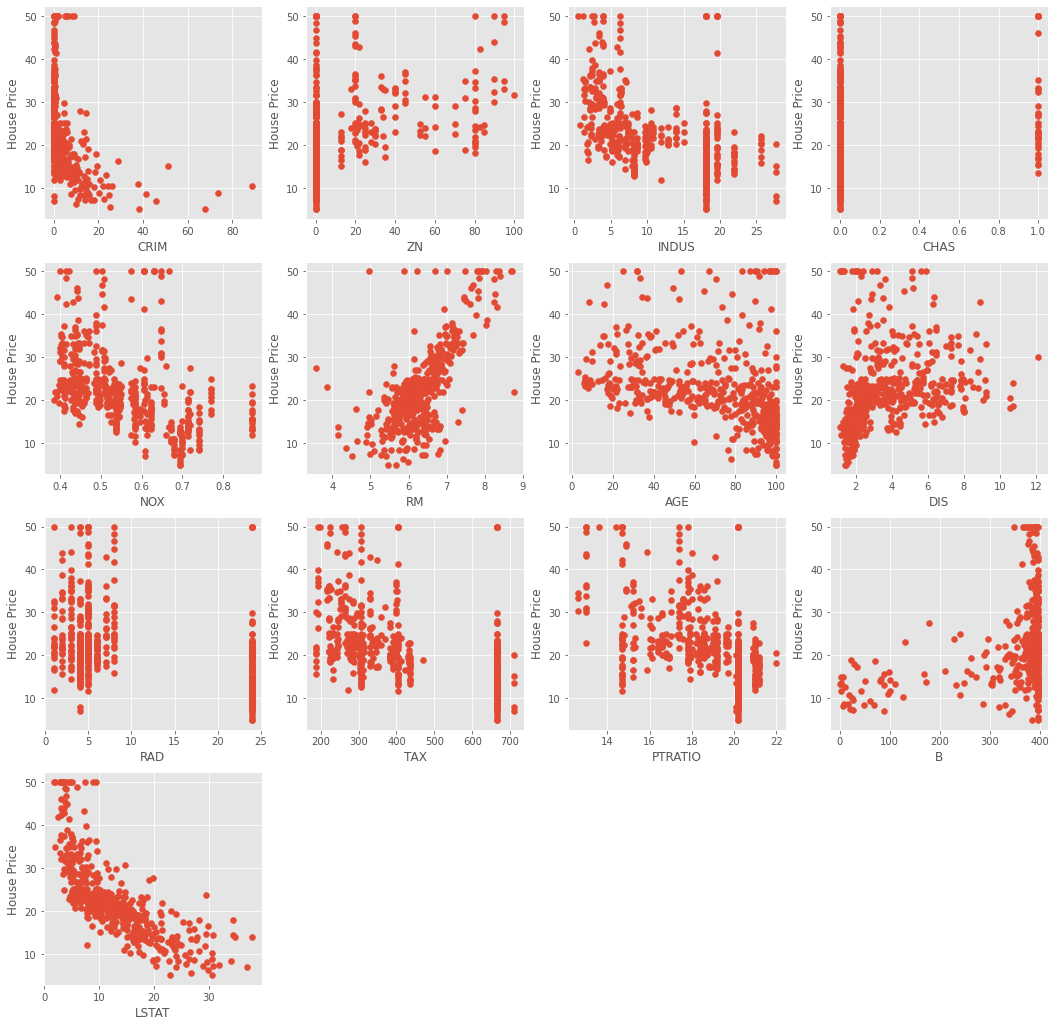

In [ ]:
# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))
 
for index, feature_name in enumerate(boston_dataset.feature_names):
    ax = fig.add_subplot(4, 4, index + 1)
    ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
    ax.set_ylabel('House Price', size = 12)
    ax.set_xlabel(feature_name, size = 12)
 
plt.show()

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.25)

print("Train data shape X = % s and y = % s : "%(
    X_train.shape, y_train.shape))
 
print("Test data shape X = % s and y = % s : "%(
    X_test.shape, y_test.shape))

Train data shape X = (379, 13) and y = (379,) : 
Test data shape X = (127, 13) and y = (127,) : 


In [ ]:
# StandarScale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
211,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
195,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97
434,13.91340,0.0,18.10,0.0,0.713,6.208,95.0,2.2222,24.0,666.0,20.2,100.63,15.17
90,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.32543,0.0,21.89,0.0,0.624,6.431,98.8,1.8125,4.0,437.0,21.2,396.90,15.39
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36
372,8.26725,0.0,18.10,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88
164,2.24236,0.0,19.58,0.0,0.605,5.854,91.8,2.4220,5.0,403.0,14.7,395.11,11.64


In [ ]:
X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.365345,-0.496544,-0.032725,3.610684,-0.554810,-1.241634,0.723924,-0.089781,-0.624840,-0.752319,0.105433,0.410116,1.604117
1,-0.403233,-0.496544,-0.546098,-0.276956,-0.724461,1.198062,-0.238694,0.513705,-0.857810,-0.961052,-0.258658,0.383643,-1.179552
2,-0.404699,2.828737,-1.510133,-0.276956,-1.123142,2.143256,-1.257319,0.829468,-0.624840,-0.883523,-1.806046,0.399022,-1.327457
3,1.106457,-0.496544,1.062570,-0.276956,1.345287,-0.140277,0.947951,-0.758477,1.704863,1.567596,0.833615,-2.826040,0.374838
4,-0.401108,-0.496544,-1.079890,-0.276956,-0.554810,0.146021,-0.063673,-0.355211,-0.857810,-0.794066,-0.258658,0.376503,-0.512588
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,-0.370819,-0.496544,1.615322,-0.276956,0.590338,0.165198,1.080967,-0.948362,-0.624840,0.201888,1.288729,0.428351,0.405535
375,-0.362493,-0.496544,-0.133358,-0.276956,-0.088268,0.098076,-0.025168,-0.151191,-0.624840,-0.591297,0.014410,0.409787,-0.296313
376,0.492611,-0.496544,1.062570,3.610684,0.963571,-0.596436,0.758928,-1.264866,1.704863,1.567596,0.833615,-0.110112,-0.502821
377,-0.162412,-0.496544,1.278420,-0.276956,0.429169,-0.625203,0.835937,-0.665876,-0.508355,-0.000881,-1.669512,0.408688,-0.117712


# Plot Function

In [ ]:
def plot_model(model_coeffs):
  # plotting the coefficient score
  fig, ax = plt.subplots(figsize =(10, 5))
  
  color =['tab:gray', 'tab:blue', 'tab:orange',
  'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
  'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
  'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
  
  ax.bar(model_coeffs["Columns"],
  model_coeffs['Coefficient Estimate'],
  color = color)
  
  ax.spines['bottom'].set_position('zero')
  
  plt.style.use('ggplot')
  plt.show()


# Multiple Linear Regression 

$$y = w_0 + w_1 x_{1} + w_2 x_{2} + ... + w_n x_{n} + \epsilon$$

$$J(w) = \sum_{i=1}^m r_i^2 = \sum_{i=1}^m (y_i - \tilde{y}_i)^2 = \sum_{i=1}^m (y_i - \tilde{w}_0 - \tilde{w}_1 x_1 - ... - \tilde{w}_n x_n)^2$$



In [ ]:
# multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)
 
# Prediccion en test set
lreg_y_pred = lreg.predict(X_test_scaled)

# MSE train set
mse_train = np.mean((lreg.predict(X_train_scaled) - y_train)**2)
print("Mean squared Error on train set : ", mse_train)
 
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)
 
# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = X_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on train set :  20.11486173313239
Mean squared Error on test set :  37.173340973712655
    Columns  Coefficient Estimate
0      CRIM             -0.981919
1        ZN              1.103023
2     INDUS              0.706474
3      CHAS              0.181104
4       NOX             -2.054656
5        RM              3.302312
6       AGE             -0.067952
7       DIS             -2.860861
8       RAD              2.200599
9       TAX             -2.191210
10  PTRATIO             -2.275399
11        B              1.048264
12    LSTAT             -3.420124


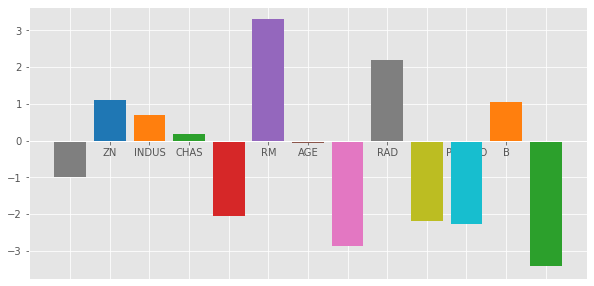

In [ ]:
plot_model(lreg_coefficient)

# Ridge Regression

\begin{equation}
  J(w)= \sum_i (w^T x_i - y_i)^2  + \lambda w^2
\end{equation}



In [ ]:
def ridge(lambd, X_train = X_train_scaled, y_train = y_train, X_test = X_test_scaled, y_test = y_test):
  from sklearn.linear_model import Ridge

  # Train the model
  ridgeR = Ridge(alpha = lambd)
  ridgeR.fit(X_train, y_train)
  y_pred = ridgeR.predict(X_test)

  # mse train set
  mse_train = np.mean((ridgeR.predict(X_train) - y_train)**2)
  #print('MSE RIDGE train set :', mse_train)

  
  # mean square error
  mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
  
  #ridge coefficient
  df_ridge_coefficient = pd.DataFrame()
  df_ridge_coefficient["Columns"]= X_train.columns
  df_ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
  return mean_squared_error_ridge, df_ridge_coefficient, ridgeR.coef_, mse_train

In [ ]:
mse_ridge, ridge_coefficient,_,mse_train = ridge(1)
print('MSE RIDGE train set :', mse_train)
print('MSE RIDGE test set :', mse_ridge)
print('-----------------')
print(ridge_coefficient)

MSE RIDGE train set : 21.84825265392536
MSE RIDGE test set : 27.298676841645808
-----------------
    Columns  Coefficient Estimate
0      CRIM             -1.009143
1        ZN              0.980959
2     INDUS             -0.194660
3      CHAS              0.701500
4       NOX             -1.807307
5        RM              3.044062
6       AGE             -0.198334
7       DIS             -3.205758
8       RAD              2.488452
9       TAX             -1.959227
10  PTRATIO             -2.060459
11        B              0.594750
12    LSTAT             -3.844630


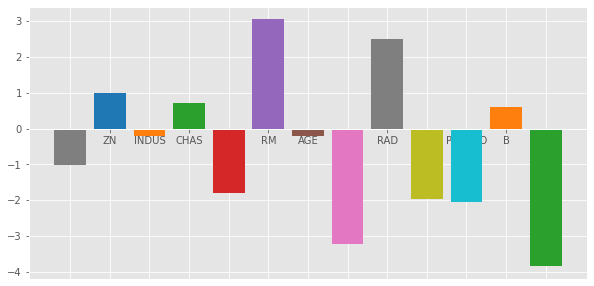

In [ ]:
plot_model(ridge_coefficient)

### Lambda vs MSE

Text(0.5, 1.0, 'Train set')

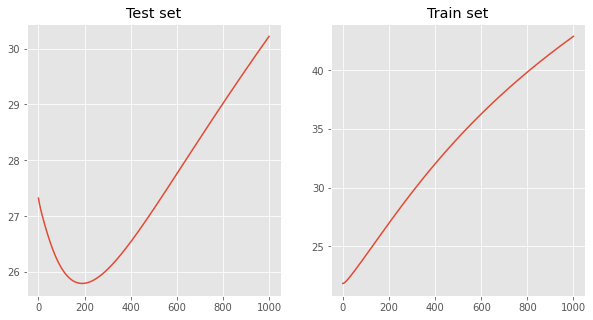

In [ ]:
# Veamos como varia el MSE por lambda
lambdas = np.linspace(0,1000,1000)
ridge_test_mses = [ridge(l)[0] for l in lambdas]
ridge_train_mses = [ridge(l)[3] for l in lambdas]

fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1,2,1)
plt.plot(lambdas, ridge_test_mses)
plt.title('Test set')
fig.add_subplot(1,2,2)
plt.plot(lambdas, ridge_train_mses)
plt.title('Train set')

### Lambda vs Weights

Text(0, 0.5, 'weights')

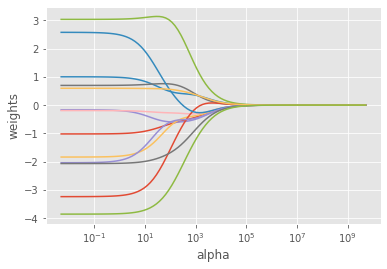

In [ ]:
# Veamos como varia el MSE por lambda
lambdas = 10**np.linspace(10,-2,100)*0.5
ridge_coeffs = [ridge(l)[2] for l in lambdas]
ax = plt.gca()
ax.plot(lambdas, ridge_coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

# Lasso Regression

\begin{equation}
  J(w)= \sum_i (w^T x_i - y_i)^2  + \lambda ||w||_1
\end{equation}

In [ ]:
def lasso(lambd, X_train = X_train_scaled, y_train = y_train, X_test = X_test_scaled, y_test = y_test):
  from sklearn.linear_model import Lasso
 
  # Train the model
  lasso = Lasso(alpha = lambd)
  lasso.fit(X_train, y_train)
  y_pred1 = lasso.predict(X_test)

  # mse train set
  mse_train = np.mean((lasso.predict(X_train) - y_train)**2)
  #print('MSE RIDGE train set :', mse_train)
  
  # Calculate Mean Squared Error
  mean_squared_error = np.mean((y_pred1 - y_test)**2)

  df_lasso_coeff = pd.DataFrame()
  df_lasso_coeff["Columns"] = X_train.columns
  df_lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
  
  return mean_squared_error, df_lasso_coeff, lasso.coef_, mse_train




In [ ]:
mse_lasso, lasso_coefficient,_,mse_train = lasso(1)
print('MSE LASSO train set :', mse_train)
print('MSE LASSO :', mse_lasso)
print('-----------------')
print(lasso_coefficient)

MSE LASSO train set : 28.39264682044312
MSE LASSO : 29.095045432946005
-----------------
    Columns  Coefficient Estimate
0      CRIM             -0.000000
1        ZN              0.000000
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              3.063196
6       AGE             -0.000000
7       DIS             -0.000000
8       RAD             -0.000000
9       TAX             -0.000000
10  PTRATIO             -1.555405
11        B              0.000000
12    LSTAT             -3.730375


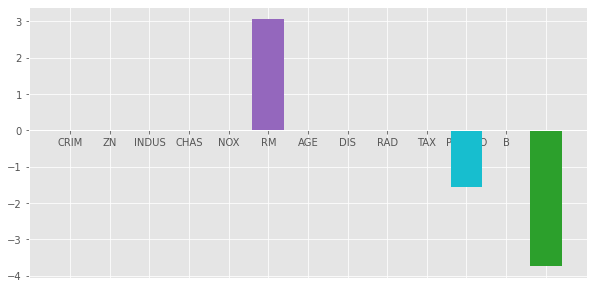

In [ ]:
plot_model(lasso_coefficient)

### Lambda Vs MSE

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4139.9303649750655, tolerance: 3.5223024591029035
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to u

Text(0.5, 1.0, 'Train set')

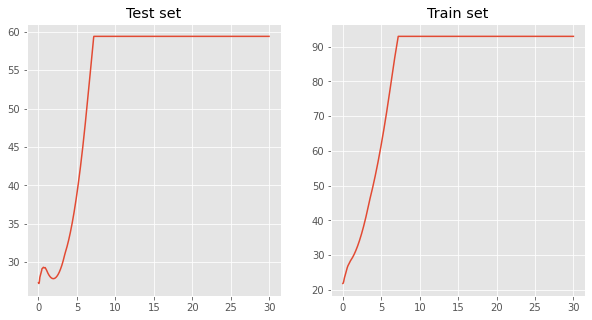

In [ ]:
# Veamos como varia el MSE por lambda
lambdas = np.linspace(0,30,1000)
lasso_test_mses = [lasso(l)[0] for l in lambdas]
lasso_train_mses = [lasso(l)[3] for l in lambdas]

fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1,2,1)
plt.plot(lambdas, lasso_test_mses)
plt.title('Test set')
fig.add_subplot(1,2,2)
plt.plot(lambdas, lasso_train_mses)
plt.title('Train set')

### Lambda vs Weights

Text(0, 0.5, 'weights')

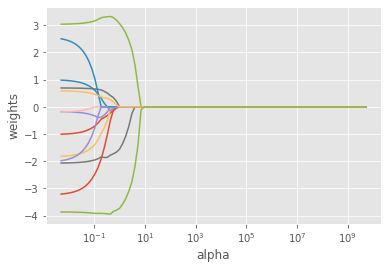

In [ ]:
# Veamos como varia el MSE por lambda
lambdas = 10**np.linspace(10,-2,100)*0.5
lasso_coeffs = [lasso(l)[2] for l in lambdas]
ax = plt.gca()
ax.plot(lambdas, lasso_coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

# Conclusiones:
## Ridge: 
- Incluye todas (o ninguna) las variables del modelo. Por lo tanto, la principal ventaja de la regresión ridge es el 'shrinkage' del coeficiente y la reducción de la complejidad del modelo.
- Normalmente se utiliza para reducit el sobre ajuste
- En general, funciona bien incluso en presencia de variables altamente correlacionadas, ya que las incluirá todas en el modelo, pero los coeficientes se distribuirán entre ellas según la correlación. 


## Lasso: 
- Junto con los coeficientes de reducción, Lasso también realiza la selección de variables.Algunos de los coeficientes se vuelven exactamente cero, lo que equivale a que la variable particular se excluya del modelo.

- Normalmente se utiliza para reducir las variables y obtener una'sparse solution' (Ej: cuando hay miles de variables)

- Selecciona arbitrariamente cualquier característica entre las altamente correlacionadas y reduce los coeficientes del resto a cero. Además, la variable elegida cambia aleatoriamente con el cambio en los parámetros del modelo. Por lo general, esto no funciona tan bien en comparación con la regresión ridge



# Referencias:
- https://www.cienciadedatos.net/documentos/py14-ridge-lasso-elastic-net-python.html
- https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/
- https://www.geeksforgeeks.org/implementation-of-lasso-ridge-and-elastic-net/
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html